#**Mansi Chauhan**
#**B K Birla College of Arts, Science & Commerce**

#***Gold Forecasting with arima model***

***Importing Libraries***

In [ ]:
#installing pdarima for our model
pip install pmdarima

     |████████████████████████████████| 1.5 MB 893 kB/s 
     |████████████████████████████████| 2.1 MB 7.7 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#importing all necessaary libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor

***Reading Data***

In [ ]:
golds=pd.read_csv('/content/GoldUP.csv')


In [ ]:
golds

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


***Gold_Price Analysis***

(239, 8)

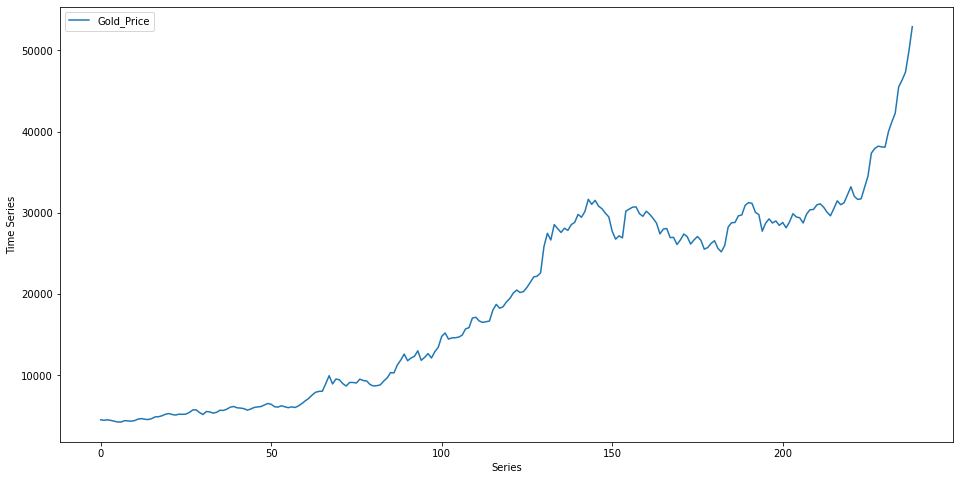

In [ ]:
series = pd.DataFrame(data=golds['Gold_Price'], columns = ['Gold_Price'] ).dropna()
series.plot(figsize=(16,8));
plt.ylabel('Time Series')
plt.xlabel('Series')
golds.shape


In [ ]:
golds.shape

(239, 8)

In [ ]:
golds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [ ]:
golds.describe()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


***Skewness & Kurtosis of Gold Price***

Skewness: %f 0.2488536311924413
Kurtosis: -0.995847


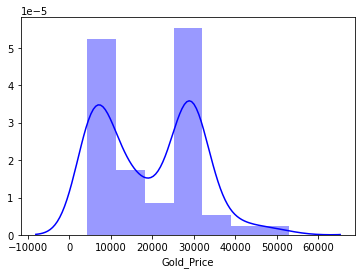

In [ ]:
sns.distplot(golds['Gold_Price'], color = 'blue')
print('Skewness: %f', golds['Gold_Price'].skew())
print("Kurtosis: %f" % golds['Gold_Price'].kurt())

***Additive Decomposition***

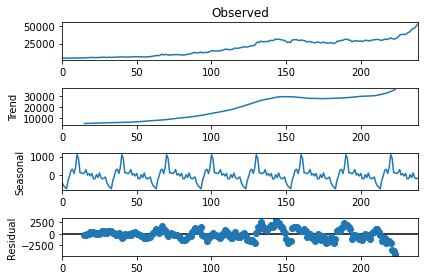

In [ ]:
result = seasonal_decompose(series.values, model = 'additive', period = 30)
result.plot();
plt.show()

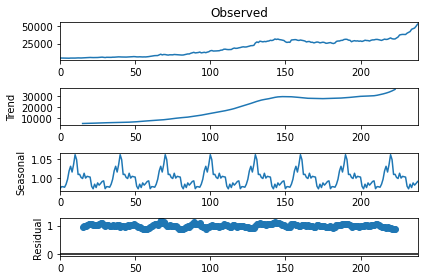

In [ ]:
result2 = seasonal_decompose(series.values, model = 'multiplicative', period = 30)
result2.plot();
plt.show()

***Auto Correlation***

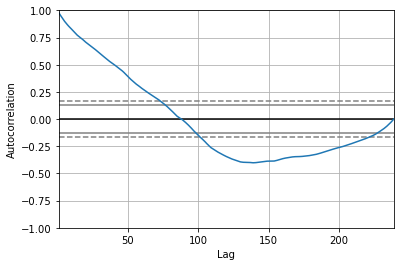

In [ ]:
pd.plotting.autocorrelation_plot(series)

***Defining Dependent & Independent Variables***

In [ ]:
features=["Crude_Oil","Interest_Rate","USD_INR","Sensex","CPI","USD_Index"]
x = golds[features]
y = golds.Gold_Price

In [ ]:
x.head()

,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [ ]:
y.head()

0    4538
1    4483
2    4541
3    4466
4    4370
Name: Gold_Price, dtype: int64

***Gold Price V/S Dependent Variables***

Text(0, 0.5, 'Crude_Oil')

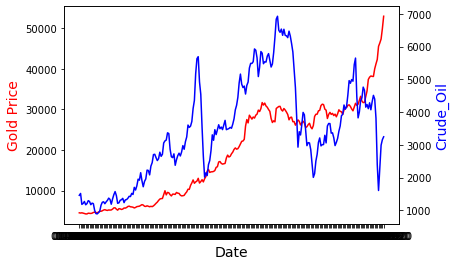

In [ ]:
fig,ax = plt.subplots()
ax.plot(golds.Date, golds.Gold_Price, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Gold Price",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(golds.Date, golds.Crude_Oil,color="blue")
ax2.set_ylabel("Crude_Oil",color="blue",fontsize=14)

Text(0, 0.5, 'Interest Rates')

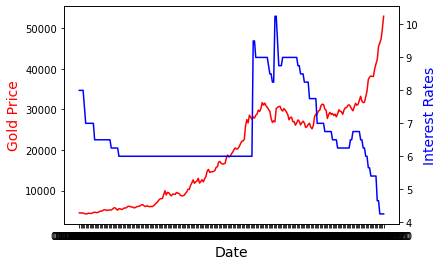

In [ ]:
fig,ax = plt.subplots()
ax.plot(golds.Date, golds.Gold_Price, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Gold Price",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(golds.Date, golds.Interest_Rate,color="blue")
ax2.set_ylabel("Interest Rates",color="blue",fontsize=14)

Text(0, 0.5, 'Dollar to Rupee')

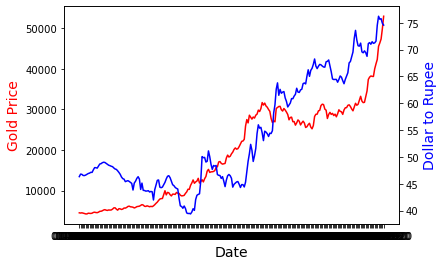

In [ ]:
fig,ax = plt.subplots()
ax.plot(golds.Date, golds.Gold_Price, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Gold Price",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(golds.Date, golds.USD_INR,color="blue")
ax2.set_ylabel("Dollar to Rupee",color="blue",fontsize=14)

Text(0.5, 0, 'Series')

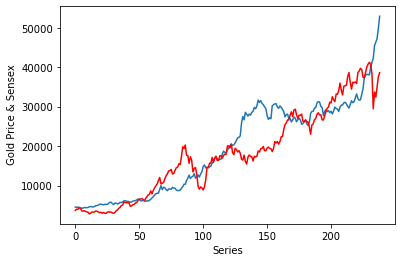

In [ ]:
plt.plot(golds.Gold_Price);
plt.plot(golds.Sensex,color="red")

plt.ylabel(" Gold Price & Sensex")
plt.xlabel("Series")

Text(0, 0.5, 'CPI')

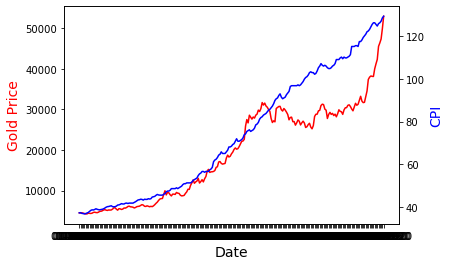

In [ ]:
fig,ax = plt.subplots()
ax.plot(golds.Date, golds.Gold_Price, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Gold Price",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(golds.Date, golds.CPI,color="blue")
ax2.set_ylabel("CPI",color="blue",fontsize=14)

Text(0, 0.5, 'Dollar Index')

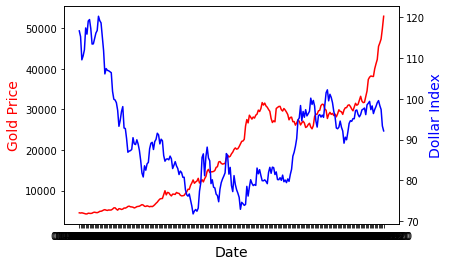

In [ ]:
fig,ax = plt.subplots()
ax.plot(golds.Date, golds.Gold_Price, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Gold Price",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(golds.Date, golds.USD_Index,color="blue")
ax2.set_ylabel("Dollar Index",color="blue",fontsize=14)

***Scatter Plots***

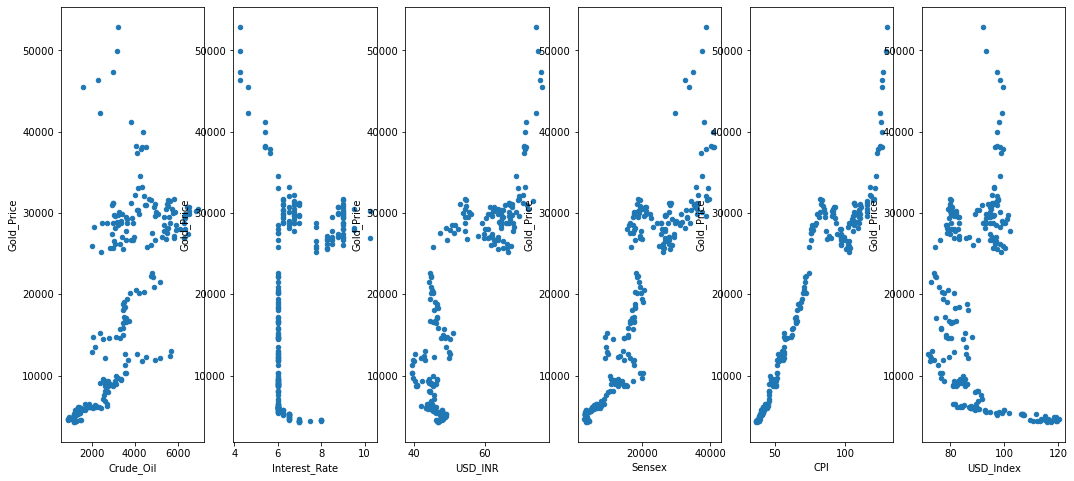

In [ ]:
fig, axis = plt.subplots(1,6)
golds.plot(kind= 'scatter', x= 'Crude_Oil' , y= 'Gold_Price', ax=axis[0], figsize=(18,8));
golds.plot(kind= 'scatter', x= 'Interest_Rate', y= 'Gold_Price', ax=axis[1]);
golds.plot(kind= 'scatter', x= 'USD_INR', y= 'Gold_Price', ax=axis[2]);
golds.plot(kind= 'scatter', x= 'Sensex', y= 'Gold_Price', ax=axis[3]);
golds.plot(kind= 'scatter', x= 'CPI', y= 'Gold_Price', ax=axis[4]);
golds.plot(kind= 'scatter', x= 'USD_Index', y= 'Gold_Price', ax=axis[5]);

***Designing a Multiple Regression Model***

In [ ]:
gldlr = LinearRegression()
gldlr = gldlr.fit(x,y)

In [ ]:
print('y intercepts: ', gldlr.intercept_)
print('Cofficients: ', gldlr.coef_)

y intercepts:  -2544.515336139986
Cofficients:  [ 1.27661583e+00 -7.23404537e+02 -2.89155123e+02 -6.85908153e-01
  6.96709372e+02 -8.11774161e+00]


***Prediction(goodness of fit) of the forcast variable***

In [ ]:
y_pred = gldlr.predict(x)
print('Predicted vales of Gold Price \n', y_pred) 

Predicted vales of Gold Price 
 [ 2579.33910557  2387.85434111  1805.86182489  1598.16824557
  1965.50688922  2686.95082648  2936.69380043  3079.94239169
  3485.57359264  3770.55846746  4097.82145337  4179.85024401
  4195.20459938  4095.23121075  3943.95366568  3706.61668602
  3433.77751928  3822.41459854  4069.58817291  4407.46857855
  4538.24178766  5112.71822685  5269.15866937  5589.59843296
  5713.50448213  5666.97723729  5533.35740087  5817.02139642
  6030.8603887   6236.08261525  6435.53611388  6661.10210977
  6731.60315291  6983.78990931  6692.67118139  6453.15061932
  6614.10197432  6577.60720402  5970.56115538  6299.1307729
  6364.88838332  6591.82856509  6836.803889    7595.24070072
  7597.34653766  7633.39914876  8085.83407958  7979.67985077
  8956.34563633  7884.7984587   7566.05875079  8077.21382932
  8054.80981408  8529.75566321  8958.76636182  8333.88204543
  8418.79447926  8790.40627246  9555.71012136  8547.47350315
  9024.84227338  8306.42404498  7775.21128452  8018.74

In [ ]:
goldprice=golds['Gold_Price']

Text(0.5, 0, 'Series')

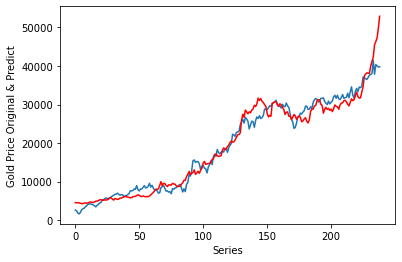

In [ ]:
plt.plot(y_pred);
plt.plot(goldprice,color="red")

plt.ylabel("Gold Price Original & Predict")
plt.xlabel("Series")



1. Red- Original Gold Prices 
1. Blue Predicted Gold Prices

***Error & Coefficient of Determination***

In [ ]:

mse = mean_squared_error(y,y_pred)
print ('MSE:', mse)
    

MSE: 5208187.864580986


In [ ]:
r_sq=gldlr.score(x,y)
print("Coefficient of Determination:",r_sq)

Coefficient of Determination: 0.9615897843964092


***Summary of Statistical Model***

In [ ]:
goldModel = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+CPI+USD_Index" ,data = golds).fit()
goldModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     968.0
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          3.99e-161
Time:                        18:37:43   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4389.
Df Residuals:                     232   BIC:                             4413.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2544.5153   1966.871     -1.294      0.197   -6419.727    1330.696
Crude_Oil         1.2766      0.219      5.831      0.000       0.845       1.708
Interest_Rate  -723.4045    183.305     -3.946      0.000   -1084.559    -362.250
USD_INR        -289.1551     75.904     -3.809      0.000    -438.704    -139.606
Sensex           -0.6859      0.063    -10.856      0.000      -0.810      -0.561
CPI             696.7094     41.806     16.665      0.000     614.341     779.078
USD_Index        -8.1177     26.742     -0.304      0.762     -60.806      44.571
==============================================================================
Omnibus:                       97.388   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.720
Skew:                           1.623   Prob(JB):                     1.19e-91
Kurtosis:                       8.614   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
goldModel1 = smf.ols(formula = "Gold_Price~Crude_Oil+USD_INR+Sensex+CPI+USD_Index" ,data = golds).fit()
goldModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1090.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          2.14e-159
Time:                        18:37:44   Log-Likelihood:                -2195.0
No. Observations:                 239   AIC:                             4402.
Df Residuals:                     233   BIC:                             4423.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2265.6242   2026.144     -1.118      0.265   -6257.529    1726.280
Crude_Oil      0.7274      0.174      4.176      0.000       0.384       1.071
USD_INR     -318.3032     77.871     -4.088      0.000    -471.724    -164.883
Sensex        -0.6027      0.061     -9.816      0.000      -0.724      -0.482
CPI          686.6095     43.013     15.963      0.000     601.865     771.354
USD_Index    -35.5455     26.619     -1.335      0.183     -87.990      16.899
==============================================================================
Omnibus:                      119.442   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.066
Skew:                           1.891   Prob(JB):                    4.03e-165
Kurtosis:                      10.857   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
goldModel2 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+Sensex+CPI+USD_Index" ,data = golds).fit()
goldModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1095.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          1.30e-159
Time:                        18:37:44   Log-Likelihood:                -2194.5
No. Observations:                 239   AIC:                             4401.
Df Residuals:                     233   BIC:                             4422.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4524.2401   1951.204     -2.319      0.021   -8368.498    -679.983
Crude_Oil         1.3965      0.223      6.267      0.000       0.957       1.836
Interest_Rate  -791.3528    187.650     -4.217      0.000   -1161.061    -421.645
Sensex           -0.5821      0.059     -9.927      0.000      -0.698      -0.467
CPI             560.5561     22.308     25.128      0.000     516.604     604.508
USD_Index       -68.2818     22.198     -3.076      0.002    -112.015     -24.548
==============================================================================
Omnibus:                       75.367   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.476
Skew:                           1.362   Prob(JB):                     8.07e-49
Kurtosis:                       6.849   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
goldModel3 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel4 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+USD_Index" ,data = golds).fit()

In [ ]:
goldModel5 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+CPI" ,data = golds).fit()
goldModel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          1.16e-162
Time:                        18:37:45   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4387.
Df Residuals:                     233   BIC:                             4408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2857.2544   1672.190     -1.709      0.089   -6151.800     437.291
Crude_Oil         1.3111      0.187      7.020      0.000       0.943       1.679
Interest_Rate  -737.8655    176.661     -4.177      0.000   -1085.923    -389.808
USD_INR        -302.7625     61.134     -4.952      0.000    -423.208    -182.317
Sensex           -0.6894      0.062    -11.124      0.000      -0.812      -0.567
CPI             701.5756     38.535     18.206      0.000     625.653     777.498
==============================================================================
Omnibus:                       98.541   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.533
Skew:                           1.637   Prob(JB):                     1.97e-94
Kurtosis:                       8.711   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
goldModel6 = smf.ols(formula = "Gold_Price~Interest_Rate+USD_INR+Sensex+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel7 = smf.ols(formula = "Gold_Price~USD_INR+Sensex+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel8 = smf.ols(formula = "Gold_Price~Interest_Rate+Sensex+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel9 = smf.ols(formula = "Gold_Price~Interest_Rate+USD_INR+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel10 = smf.ols(formula = "Gold_Price~Interest_Rate+USD_INR+Sensex+USD_Index" ,data = golds).fit()

In [ ]:
goldModel11 = smf.ols(formula = "Gold_Price~Interest_Rate+USD_INR+Sensex+CPI" ,data = golds).fit()

In [ ]:
goldModel12 = smf.ols(formula = "Gold_Price~Crude_Oil+Sensex+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel13 = smf.ols(formula = "Gold_Price~Crude_Oil+USD_INR+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel14 = smf.ols(formula = "Gold_Price~Crude_Oil+USD_INR+Sensex+USD_Index" ,data = golds).fit()

In [ ]:
goldModel15 = smf.ols(formula = "Gold_Price~Crude_Oil+USD_INR+Sensex+CPI" ,data = golds).fit()

In [ ]:
goldModel16 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel17 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+Sensex+USD_Index" ,data = golds).fit()

In [ ]:
goldModel18 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+Sensex+CPI" ,data = golds).fit()

In [ ]:
goldModel19 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+USD_Index" ,data = golds).fit()

In [ ]:
goldModel20 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+CPI" ,data = golds).fit()

In [ ]:
goldModel21 = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex" ,data = golds).fit()

In [ ]:
goldModel22 = smf.ols(formula = "Gold_Price~Sensex+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel23 = smf.ols(formula = "Gold_Price~USD_INR+CPI+USD_Index" ,data = golds).fit()

In [ ]:
goldModel24 = smf.ols(formula = "Gold_Price~USD_INR+Sensex+USD_Index" ,data = golds).fit()

In [ ]:
goldModel25 = smf.ols(formula = "Gold_Price~USD_INR+Sensex+CPI" ,data = golds).fit()

***Best Reggression Model***

In [ ]:
goldModel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          1.16e-162
Time:                        18:37:49   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4387.
Df Residuals:                     233   BIC:                             4408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2857.2544   1672.190     -1.709      0.089   -6151.800     437.291
Crude_Oil         1.3111      0.187      7.020      0.000       0.943       1.679
Interest_Rate  -737.8655    176.661     -4.177      0.000   -1085.923    -389.808
USD_INR        -302.7625     61.134     -4.952      0.000    -423.208    -182.317
Sensex           -0.6894      0.062    -11.124      0.000      -0.812      -0.567
CPI             701.5756     38.535     18.206      0.000     625.653     777.498
==============================================================================
Omnibus:                       98.541   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.533
Skew:                           1.637   Prob(JB):                     1.97e-94
Kurtosis:                       8.711   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared shows that 96.2% variation in y can be explained by these variables.

***Residual Plots***

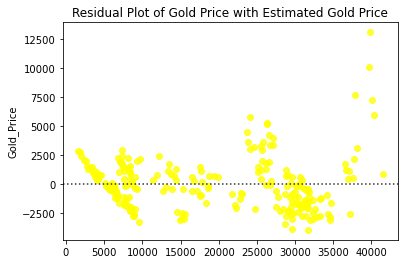

In [ ]:
sns.residplot(y_pred, y,color = 'yellow');
plt.title ('Residual Plot of Gold Price with Estimated Gold Price');

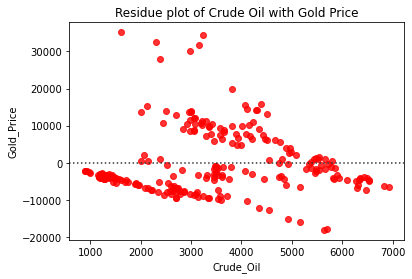

In [ ]:
sns.residplot(golds[features].Crude_Oil, y,color = 'red');
plt.title('Residue plot of Crude Oil with Gold Price');

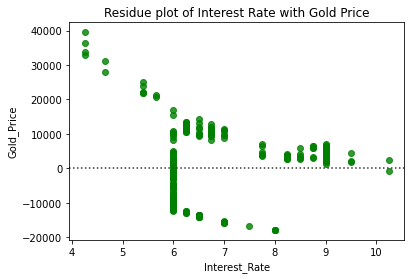

In [ ]:
sns.residplot(golds[features].Interest_Rate, y,color = 'green');
plt.title('Residue plot of Interest Rate with Gold Price');

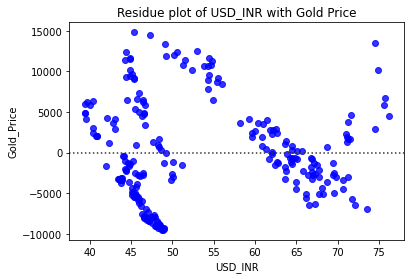

In [ ]:
sns.residplot(golds[features].USD_INR, y,color = 'blue');
plt.title('Residue plot of USD_INR with Gold Price');

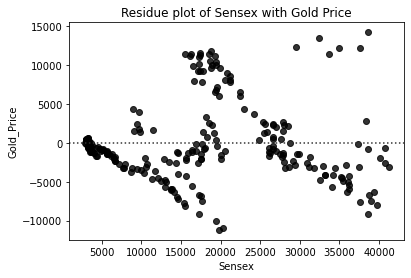

In [ ]:
sns.residplot(golds[features].Sensex, y,color = 'black');
plt.title('Residue plot of Sensex with Gold Price');

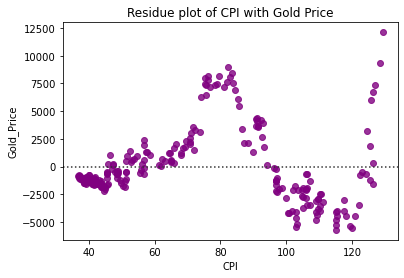

In [ ]:
sns.residplot(golds[features].CPI, y,color = 'purple');
plt.title('Residue plot of CPI with Gold Price');

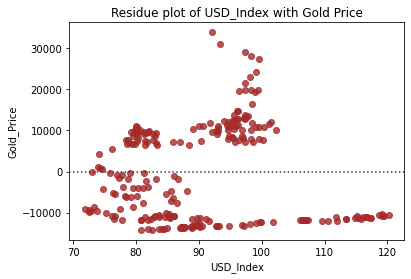

In [ ]:
sns.residplot(golds[features].USD_Index, y,color = 'brown');
plt.title('Residue plot of USD_Index with Gold Price');

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [ ]:
vif.round(1)

,VIF Factor,features
0,19.2,Crude_Oil
1,69.5,Interest_Rate
2,716.4,USD_INR
3,77.9,Sensex
4,435.1,CPI
5,190.9,USD_Index


***ARIMA Model***

In [ ]:
test = golds['Gold_Price'][200:]
train = golds['Gold_Price'][:200]

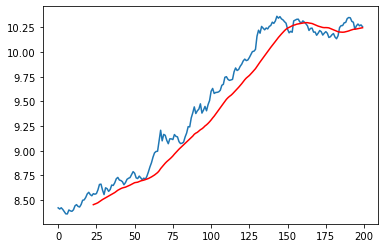

In [ ]:
train_log = np.log(train) 
test_log = np.log(test)
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [ ]:
model_9 = ARIMA(golds['Gold_Price'], order=(1,2,2))
model_9_fit = model_9.fit(disp=0)
print(model_9_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Gold_Price   No. Observations:                  237
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1896.686
Method:                       css-mle   S.D. of innovations            721.000
Date:                Tue, 30 Mar 2021   AIC                           3803.371
Time:                        18:37:54   BIC                           3820.712
Sample:                             2   HQIC                          3810.361
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0136      5.430      1.107      0.268      -4.630      16.657
ar.L1.D2.Gold_Price    -0.7082      0.162     -4.366      0.000      -1.026      -0.390
ma.L1.D2.Gold_Pr

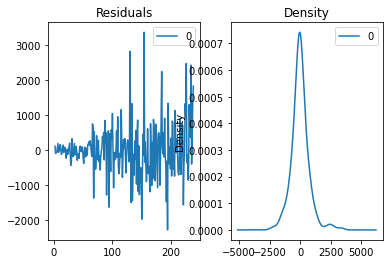

In [ ]:
residuals = pd.DataFrame(model_9_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
model_best = ARIMA(train, order=(1,2,2))  
fitted = model_best.fit(disp=-1)  

In [ ]:
fc, se, conf = fitted.forecast(39, alpha=0.05) 

In [ ]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

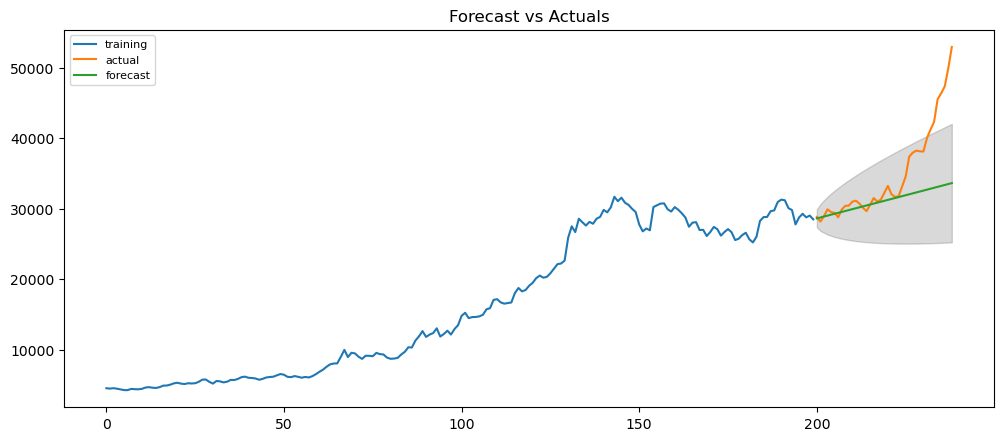

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mse = np.mean((forecast-actual)**2)
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]# corr
            
    return({'mape':mape, 'me':me, 'mse':mse,'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'mape': 0.08847119945764967,
 'me': -3626.8800904586437,
 'mse': 39868895.84719035,
 'mae': 3742.8448648266913,
 'mpe': -0.08448176299961527,
 'rmse': 6314.182120210848,
 'corr': 0.8889504076583272}

### MAPE=8.8%, it implies that the Model is 91.8% accurate.

***Future Forecasts***

In [ ]:
model = pm.auto_arima(golds.Gold_Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3805.279, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3915.780, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3871.797, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3805.572, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3913.835, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3806.561, Time=0.39 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3804.850, Time=0.48 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3804.983, Time=0.30 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3806.769, Time=0.49 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3806.773, Time=0.54 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3806.301, Time=0.39 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3803.797, Time=0.19 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3803.940, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

In [ ]:
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(golds.Gold_Price), len(golds.Gold_Price)+n_periods)

In [ ]:
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

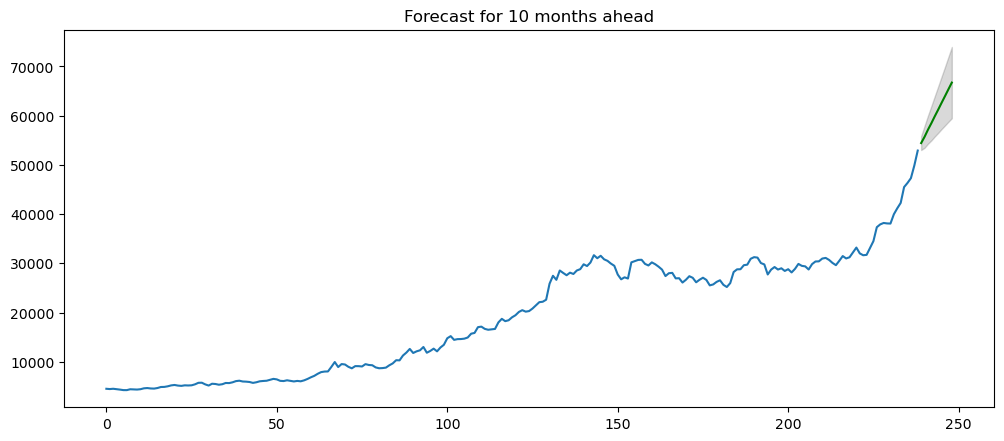

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(golds.Gold_Price)
plt.plot(fc_series, color='Green')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast for 10 months ahead")
plt.show()

Conclusion:

1. Gold Model iteration 5 (GoldModel5) having the varibles -Crude Oil, Interest Rate,Sensex, USD-INR, CPI, best describe the regression model to predict the Forecast,

2. The Model gives 91.2% accurate forecast with ARIMA